# 합성곱 신경망 맛보기

- 심층 신경망 비교를 위해서 일단 심층신경망 생성(ConvNet이 적용안된 것)
- fashion_mnist 데이터셋은 28*28 크기의 그레이 이미지 7만개로 구성
- label은 0에서 9까지의 정수값을 가지는 배열

In [2]:
# 코드 5-1 라이브러리 호출
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

In [ ]:
# 코드 5-2 CPU 혹은 GPU 사용 여부 확인
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [3]:
# 코드 5-3 데이터세트 내려받기
train_dataset = torchvision.datasets.FashionMNIST(root='psdata/ps5060', download=True, transform=transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST(root='psdata/ps5060', download=True, train=False, transform=transforms.Compose([transforms.ToTensor()]))

In [4]:
# 코드 5-4 데이터를 메모리에 로딩하기
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100)

In [5]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: psdata/ps5060
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [6]:
train_dataset[0].__class__

tuple

In [7]:
train_dataset[0] # 튜플로 되어 있는데 첫번째 요소는 이미지 두번째는 레이블

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [8]:
train_dataset[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [9]:
train_dataset[0][1]

9

In [10]:
len(train_dataset[0]) # 이미지와 레이블을 함께 받아오는 것이기 때문에 2개

2

In [11]:
len(train_dataset[0][0]) 

1

In [12]:
train_dataset[0][0].shape # 그레이 이미지

torch.Size([1, 28, 28])

In [13]:
test_dataset # 총 7만장중 6만장은 학습 1만장은 테스트

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: psdata/ps5060
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

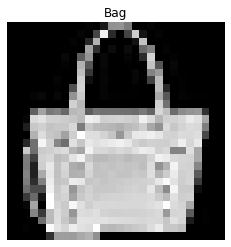

In [14]:
# 코드 5-5 분류에 사용될 클래스 정의 
labels_map = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

fig = plt.Figure(figsize=(8,8))
columns = 4
rows = 5
for i in range(1, columns * rows + 1):
    img_xy = np.random.randint(len(train_dataset))
    img = train_dataset[img_xy][0][0,:,:] # 3차원 배열 생성
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [15]:
# 코드 5-6 심층 신경망 모델생성
class FashionDNN(nn.Module): # nn은 딥러닝 모델(네트워크) 구성에 필요한 모듈이 모여있는 패키지
    def __init__(self): # 클래스형태의 모델은 항상 torch.nn.Module을 상속받아야 한다.
        super(FashionDNN,self).__init__() # 객체가 갖는 속성 값 초기화, super(FashionDNN) 은 FashionDNN의 부모 클래스(super)의 클래스를 상속받겠다는 것임
        self.fc1 = nn.Linear(in_features=784, out_features=256) 
        self.drop = nn.Dropout(0.25) # 0.25만큼 텐서의 값이 0이됨, 0이 안되는 갓음 기존값의 1/(1-0.25)만큼 곱해져서 커짐
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=10)
        
    def forward(self,input_data): # 순전파 함수. 이름은 반드시 forward로 지정해야함
        out = input_data.view(-1, 784) # view는 넘파이의 reshape 역할로 텐서 크기 변경 (-1, 784)은 (?, 784)의 크기로 변경(이차원 텐서로)
        out = F.relu(self.fc1(out))
        out = self.drop(out)
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [16]:
# 코드 5-7 심층 신경망에서 필요한 파라미터 정의
learning_rate = 0.001
model = FashionDNN()
model.to(device)

criterion = nn.CrossEntropyLoss() # 분류문제에서 사용하는 손실 함수
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # 최적화 함수 경사하강법은 Adam 사용
print(model)

FashionDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [17]:
# 코드 5-8 심층 신경망을 이용한 모델 학습
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader: # for를 이용해서 레코드를 하나씩 가지고 옴
        images, labels = images.to(device), labels.to(device)
        
        train = Variable(images.view(100, 1, 28, 28)) # 100은 배치 수인듯
        labels = Variable(labels)
        
        outputs = model(train) # 학습데이터를 모델에 적용
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1
        
        if not (count % 50): # 50으로 나누었을 때 나머지가 0 이면 
            total = 0
            correct = 0
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device) # 모델이 데이터를 처리하기 위해서는 동일한 device에 있어야 함
                labels_list.append(labels)
                test = Variable(images.view(100, 1, 28, 28)) # autograd는 자동미분을 수행하는 파이토치 핵심 패키지로 자동 미분에 대한 값을 저장하기 위해서 tape를 사용
                                                             # 순전파 단계에서 테이브는 수행하는 모든 연산을 저장함(그런데 이게 설명이 맞나)
                                                             # autograd는 Variable을 사용해서 역전파를 위한 미분값을 자동으로 계산해줌
                                                             # 자동미분을 게산하기 위해서는 torch.augograd 패키지 안에 있는 variable를 이용해야 동작함
                outputs = model(test)
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            
        if not (count % 500): # 500만다
            print("Iteration: {}, Loss: {}, Accuracy: {}".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.5940324068069458, Accuracy: 83.31999969482422
Iteration: 1000, Loss: 0.4805371165275574, Accuracy: 84.66999816894531
Iteration: 1500, Loss: 0.3461099863052368, Accuracy: 84.13999938964844
Iteration: 2000, Loss: 0.4197067618370056, Accuracy: 85.70999908447266
Iteration: 2500, Loss: 0.27002808451652527, Accuracy: 85.7699966430664
Iteration: 3000, Loss: 0.3119128346443176, Accuracy: 86.58999633789062


In [26]:
# 코드5-9 합성곱 네트워크 생성
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.layer1 = nn.Sequential( # __init__()에서 사용할 네트워크 모델을 정의해 줄 뿐 아닐
                                     # forward()함수에서 구현될 순전파를 계층형태로 좀 더 가독성 높은 코드로 작성
                                     # nn.Sequential은 계층을 차례로 쌓을 수 있도록 Wx + b와 같은 수식과 활성화 함수를 연결해주는 역할
                                     # 특히 데이터가 각 계층을 순차적으로 지나갈때 사용하면 좋은 방법
                                     # nn.Sequential은 여러 개의 계층을 하나의 컨테이너에 구현하는 방법
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1), # 합성곱층은 합성곱 연산을 통해서 이미지 특징 추출
                                     # in_channels는 입력 채널의 수, out_channels는 출력 채널의 수, kernel_size는 필터의 크기
            nn.BatchNorm2d(32), # 학습과정에서 각 배치 단위별로 데이터가 다양한 분포를 가지더라도 평균과 분산을 이용해서 정규화하는 것을 의미
                                # 배치단위나 계층에 따라 입력 값의 분포가 모두 다르지만, 정규화를 통해 가우시안 형태로 만듦(평균 0, 표준편차 1)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # 이미지 크기를 축소하는 용도로 사용
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600) # 클래스를 분류하기 위해서 이미지 형태의 데이터를 배열 형태로 변환
                                                                   # Conv2d에서 사용된 하이퍼파라미터(패팅과 스트라이드 값)에 따라 출력크기가 달라짐
                                                                   # 이렇게 줄어든 출력 크기는 최종적으로 분류를 담당하는 완전연결층으로 전달
                                                                   # in_feature는 입력 데이터 크기
        self.drop = nn.Dropout(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out

In [25]:
# 코드 5-10 합성곱 네트워크를 위한 파라미터 정의
learning_rate = 0.001
model = FashionCNN()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [28]:
# 코드 5-11 모델 학습 및 성능 평가

num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        outputs = model(train)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1
        
        if not (count % 50):
            total = 0
            correct = 0
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
                test = Variable(images.view(100,1,28,28))
                outputs = model(test)
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
                total += len(labels)
            
            accuracy = 100 * correct / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))
                
            

Iteration: 500, Loss: 0.442209392786026, Accuracy: 88.06999969482422%
Iteration: 1000, Loss: 0.3772539496421814, Accuracy: 86.37999725341797%
Iteration: 1500, Loss: 0.2946159839630127, Accuracy: 87.05000305175781%
Iteration: 2000, Loss: 0.17134398221969604, Accuracy: 89.3499984741211%
Iteration: 2500, Loss: 0.13496485352516174, Accuracy: 89.3499984741211%
Iteration: 3000, Loss: 0.16990675032138824, Accuracy: 90.30000305175781%
